In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings ('ignore')


In [22]:
df=pd.read_csv('USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [23]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [24]:
df.shape

(5000, 7)

In [25]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [31]:
df.describe()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [35]:
df.rename(columns={'Avg. Area Income' :'Area Income' , 'Avg. Area House Age':' House Age',
'Avg. Area Number of Rooms':' Number of Rooms','Avg. Area Number of Bedrooms': 'Number of Bedrooms'
    
},inplace=True)

In [36]:
df.head()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [39]:
df.isnull().sum()

Area Income           0
 House Age            0
 Number of Rooms      0
Number of Bedrooms    0
Area Population       0
Price                 0
Address               0
dtype: int64

In [40]:
df.duplicated().sum()

0

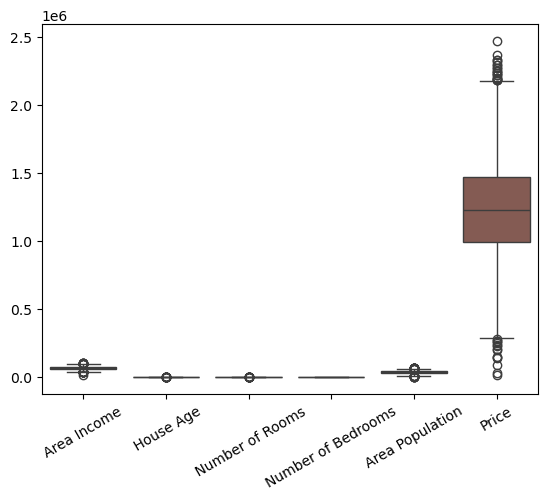

In [41]:
sns.boxplot(df)
plt.xticks(rotation=30)
plt.show()

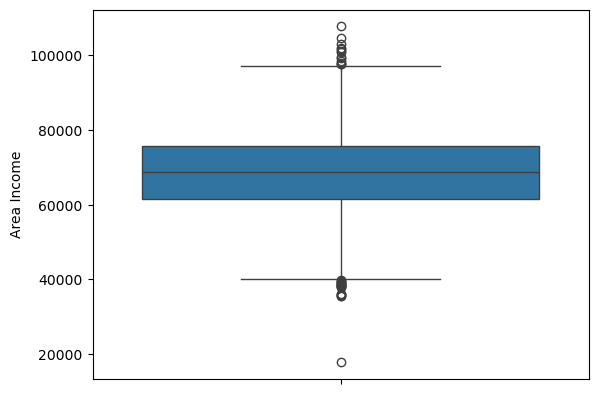

In [44]:
sns.boxplot(df['Area Income'])
plt.show()

In [46]:
df.columns

Index(['Area Income', ' House Age', ' Number of Rooms', 'Number of Bedrooms',
       'Area Population', 'Price', 'Address'],
      dtype='object')

..............................Area Income......................


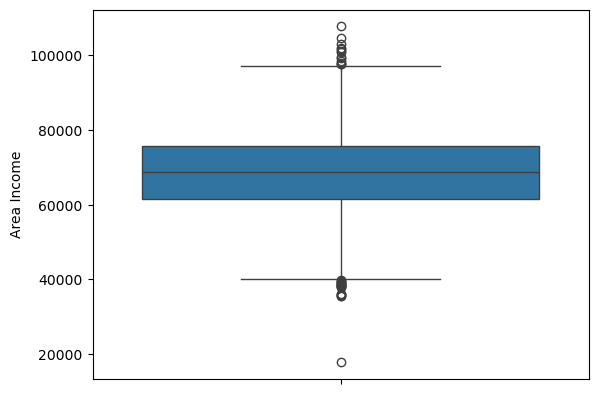

.............................. House Age......................


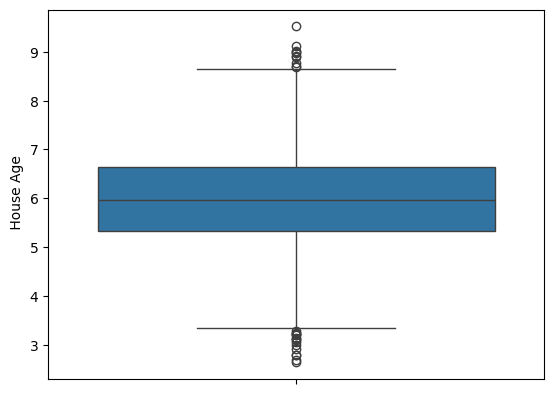

.............................. Number of Rooms......................


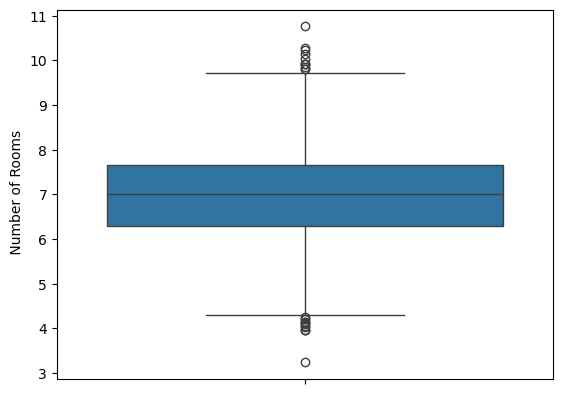

..............................Number of Bedrooms......................


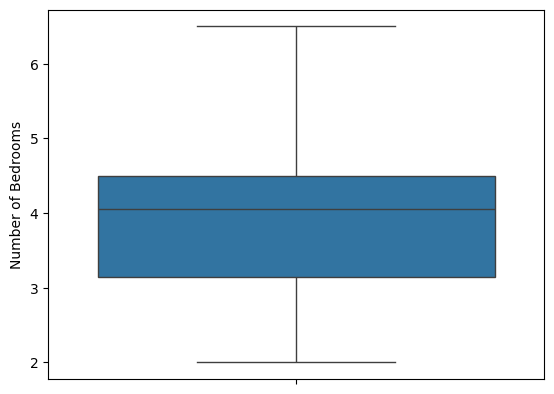

..............................Area Population......................


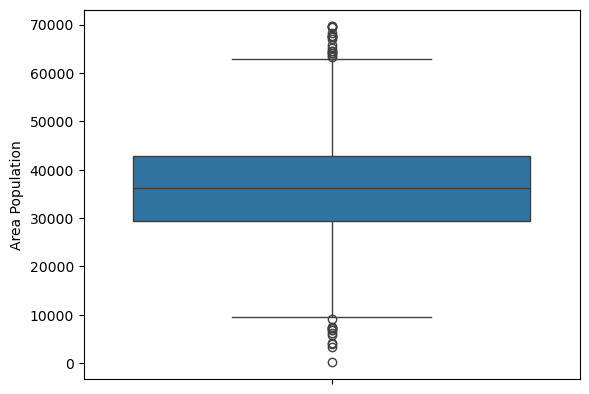

..............................Price......................


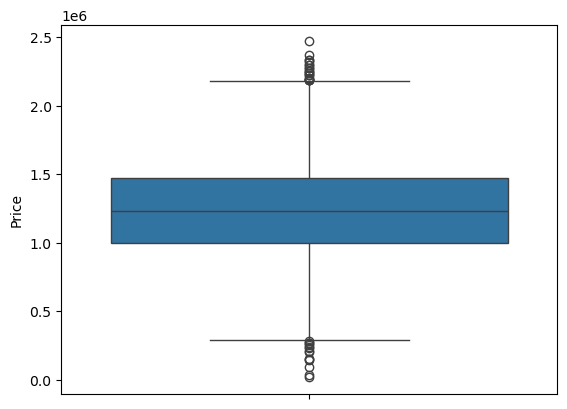

In [53]:
for i in df.columns:
    if i=='Address':
        continue
    else :
        print(f'..............................{i}......................')
        sns.boxplot(df[i])
        plt.show()

In [61]:
df.drop(columns={'Address'}, axis=1, inplace=True)

In [62]:
Q1= df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

Area Income            14302.776278
 House Age                 1.328525
 Number of Rooms           1.366621
Number of Bedrooms         1.350000
Area Population        13457.362067
Price                 473633.069163
dtype: float64

In [63]:
lower_limit=Q1- 1.5 * IQR
upper_limit= Q3+ 1.5 * IQR

In [64]:
lower_limit

Area Income            40026.397972
 House Age                 3.329495
 Number of Rooms           4.249318
Number of Bedrooms         1.115000
Area Population         9217.885601
Price                 287127.531305
dtype: float64

In [65]:
upper_limit

Area Income           9.723750e+04
 House Age            8.643597e+00
 Number of Rooms      9.715803e+00
Number of Bedrooms    6.515000e+00
Area Population       6.304733e+04
Price                 2.181660e+06
dtype: float64

In [66]:
df.shape

(5000, 6)

In [70]:
df[((df< lower_limit) |  (df >  upper_limit )).any (axis=1)]

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06
28,90499.057451,6.384359,4.242191,3.04,33970.164990,1.240764e+06
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05
90,48904.983269,4.844973,5.448956,3.38,32960.753070,2.018981e+05
228,66574.709994,5.550265,6.844150,2.17,69575.449464,1.702406e+06
...,...,...,...,...,...,...
4803,61846.135900,5.057578,7.681141,3.39,69621.713378,1.504316e+06
4844,37908.675863,6.233813,7.252916,6.07,39632.079786,8.804028e+05
4855,35797.323122,5.544221,7.795138,5.00,24844.200190,2.998630e+05
4859,73685.403658,8.916093,6.291818,3.05,36000.506028,1.798927e+06


In [71]:
df[((df< lower_limit) |  (df >  upper_limit )).any (axis=1)].index

Index([  12,   28,   39,   90,  228,  256,  263,  314,  353,  355,
       ...
       4565, 4684, 4716, 4744, 4777, 4803, 4844, 4855, 4859, 4978],
      dtype='int64', length=135)

In [74]:
ind=df[((df< lower_limit) |  (df >  upper_limit )).any (axis=1)].index
for i in ind:
    print(i)

12
28
39
90
228
256
263
314
353
355
411
465
496
558
622
693
696
715
844
847
901
918
924
962
990
1074
1091
1096
1110
1208
1234
1248
1271
1285
1356
1361
1423
1459
1485
1494
1516
1530
1531
1536
1578
1595
1597
1628
1661
1726
1734
1757
1777
1799
1855
1859
1891
1965
2025
2066
2092
2108
2173
2242
2300
2366
2380
2392
2422
2432
2465
2503
2534
2538
2597
2603
2676
2719
2756
2771
2795
2829
2839
2898
2963
3039
3069
3091
3120
3134
3138
3144
3183
3212
3336
3387
3388
3442
3466
3483
3502
3540
3541
3600
3798
3803
3806
3831
3855
3922
3989
3991
4087
4129
4182
4290
4318
4324
4400
4412
4429
4449
4451
4488
4491
4565
4684
4716
4744
4777
4803
4844
4855
4859
4978


In [76]:
df[~((df< lower_limit) |  (df >  upper_limit )).any (axis=1)]

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [77]:
df

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [79]:
df=df[~((df< lower_limit) |  (df >  upper_limit )).any (axis=1)]
df

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


feature encoding

jo string me rhega uso hatana h 


multicollinearity

In [82]:
d=df.drop(columns=['Price'])
d

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [84]:
d.corr()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097
House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151
Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244
Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000


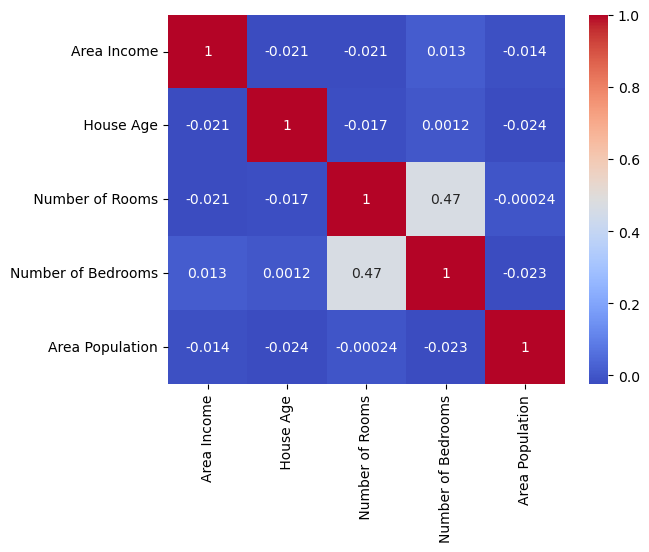

In [88]:
sns.heatmap(d.corr(),annot=True, cmap='coolwarm')
plt.show()


feature selection

In [91]:
df.corr()['Price']

Area Income           0.632031
 House Age            0.441675
 Number of Rooms      0.329630
Number of Bedrooms    0.168606
Area Population       0.406027
Price                 1.000000
Name: Price, dtype: float64

model building 

In [92]:
df

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [93]:
df.columns

Index(['Area Income', ' House Age', ' Number of Rooms', 'Number of Bedrooms',
       'Area Population', 'Price'],
      dtype='object')

In [96]:
x=df.drop(columns=['Price'], axis=1)
y=df['Price']

In [97]:
x

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [98]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4865, dtype: float64

In [99]:
x_train ,x_test ,y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)

In [100]:
x_train

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
2363,69266.087427,5.891946,7.148314,3.40,37180.500359
1887,60812.864534,7.157499,6.276444,2.22,26411.142277
3633,69206.554811,7.465323,7.624139,6.39,27666.403599
184,82906.654801,5.901452,5.767366,4.26,38820.481944
4526,69664.075765,7.612180,5.945619,2.00,37012.993434
...,...,...,...,...,...
4551,79500.398946,8.554884,6.160048,3.29,32069.117413
478,62685.270752,6.057649,6.766130,2.17,42018.938568
3185,66469.369473,4.663863,6.117542,4.13,22670.608616
3881,59084.725195,7.086564,6.144059,2.11,42955.908360


In [101]:
x_test

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
2250,80431.035597,5.474911,6.322611,4.05,34615.598486
4583,62654.359483,5.674788,6.850386,4.24,36718.512313
2729,66300.581924,6.114219,5.588031,4.22,31581.838516
2166,65013.212446,7.321305,7.591328,3.13,23039.889474
4874,67794.294771,8.104891,6.211783,2.45,25903.809477
...,...,...,...,...,...
1520,69882.273926,5.646558,5.647646,4.35,19544.751964
2610,55421.168887,8.223912,7.526952,3.07,30995.209936
2089,77033.913592,4.079782,8.441009,6.26,26160.161047
2331,79817.665761,6.019475,8.073787,5.41,31765.901385


model selection

In [103]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [112]:
print(f' training accuracy: {round(lr.score(x_train,y_train),2)*100}%') 
print(f' test accuracy: {round(lr.score(x_test,y_test),2)*100}%') 

 training accuracy: 91.0%
 test accuracy: 91.0%


using knn

In [124]:
knn=KNeighborsRegressor(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [125]:
print(f' training accuracy: {round(knn.score(x_train,y_train),2)*100}%') 
print(f' test accuracy: {round(knn.score(x_test,y_test),2)*100}%')

 training accuracy: 61.0%
 test accuracy: 53.0%


Decision tree

In [126]:
tree=DecisionTreeRegressor(max_depth=10)
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [127]:
print(f' training accuracy: {round(tree.score(x_train,y_train),2)*100}%') 
print(f' test accuracy: {round(tree.score(x_test,y_test),2)*100}%')

 training accuracy: 95.0%
 test accuracy: 78.0%


model training---linear regression

In [129]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [131]:
lr.coef_

array([2.15590620e+01, 1.65958273e+05, 1.19758233e+05, 1.06755714e+03,
       1.49866650e+01])

In [132]:
x.columns

Index(['Area Income', ' House Age', ' Number of Rooms', 'Number of Bedrooms',
       'Area Population'],
      dtype='object')

In [134]:
pd.DataFrame(lr.coef_, index=x.columns, columns=['corfficint/slope'])

,corfficint/slope
Area Income,21.559062
House Age,165958.272744
Number of Rooms,119758.232952
Number of Bedrooms,1067.557140
Area Population,14.986665


In [135]:
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [136]:
x_train[:3]

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
2363,69266.087427,5.891946,7.148314,3.40,37180.500359
1887,60812.864534,7.157499,6.276444,2.22,26411.142277
3633,69206.554811,7.465323,7.624139,6.39,27666.403599


In [137]:
y_train[:3]

2363    1.107160e+06
1887    9.782413e+05
3633    1.404036e+06
Name: Price, dtype: float64

In [138]:
y_train_pred[:3]

array([1266013.9307229 , 1026729.25636164, 1443436.66594482])

In [139]:
x_test[:4]

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
2250,80431.035597,5.474911,6.322611,4.05,34615.598486
4583,62654.359483,5.674788,6.850386,4.24,36718.512313
2729,66300.581924,6.114219,5.588031,4.22,31581.838516
2166,65013.212446,7.321305,7.591328,3.13,23039.889474


In [140]:
y_test[:4]

2250    1.300479e+06
4583    1.053485e+06
2729    1.009769e+06
2166    1.131041e+06
Name: Price, dtype: float64

In [141]:
y_test_pred[:4]

array([1300879.08720862, 1045725.77688449,  969081.69718646,
       1252385.5766491 ])

model evaluation

In [142]:
mean_squared_error(y_train,y_train_pred)

10083105986.347572

In [143]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

100414.67017496782

In [144]:
r2_score(y_train,y_train_pred)

0.911537564238988